In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import RandomizedSearchCV

In [4]:
data = pd.read_csv('../Datasets/BankChurners.csv')

In [7]:
data.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6         Unknown        Married         $120K +          Gold   
7     High School        Unknown     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   
5              36  ...        4010.0                 1247           2763.0   
6              46  ...       34516.0                 2264          32252.0   
7              27  ...       29081.0                 1396          27685.0   
8              36  ...       22352.0                 2517          19835.0   
9              36  ...       11656.0                 1677           9979.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   
5                 1.376             1088              24                0.846   
6                 1.975             1330              31                0.722   
7                 2.204             1538              36                0.714   
8                 3.355             1350              24                1.182   
9                 1.524             1441              32                0.882   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   
5                  0.311   
6                  0.066   
7                  0.048   
8                  0.113   
9                  0.144   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2

In [36]:
data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace=True)

In [37]:
data.tail(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10117  712503408  Existing Customer            57      M                2   
10118  713755458  Attrited Customer            50      M                1   
10119  716893683  Attrited Customer            55      F                3   
10120  710841183  Existing Customer            54      M                1   
10121  713899383  Existing Customer            56      F                1   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10117        Graduate        Married    $80K - $120K          Blue   
10118         Unknown        Unknown    $80K - $120K          Blue   
10119      Uneducated         Single         Unknown          Blue   
10120     High School         Single     $60K - $80K          Blue   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10117              40  ...                       3                      4   
10118              36  ...                       3                      4   
10119              47  ...                       3                      3   
10120              34  ...                       2                      0   
10121              50  ...                       1                      4   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10117       17925.0                 1909          16016.0   
10118        9959.0                  952           9007.0   
10119       14657.0                 2517          12140.0   
10120       13940.0                 2109          11831.0   
10121        3688.0                  606           3082.0   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10117                 0.712            17498             111   
10118                 0.825            10310              63   
10119                 0.166             6009              53   
10120                 0.660            15577             114   
10121                 0.570            14596             120   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10117                0.820                  0.106  
10118                1.100                  0.096  
10119  

In [90]:
data.shape

(10127, 21)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [11]:
data.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

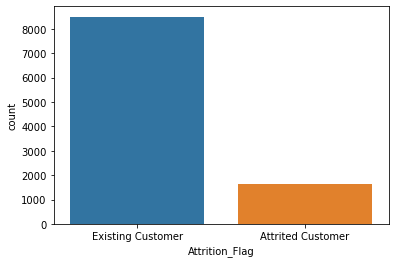

In [110]:
sns.countplot(x = 'Attrition_Flag', data=data)

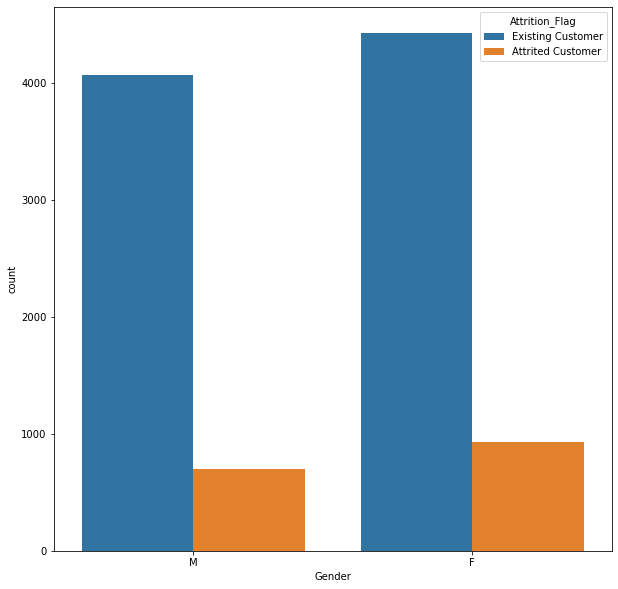

In [28]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Gender", hue='Attrition_Flag', data=data)

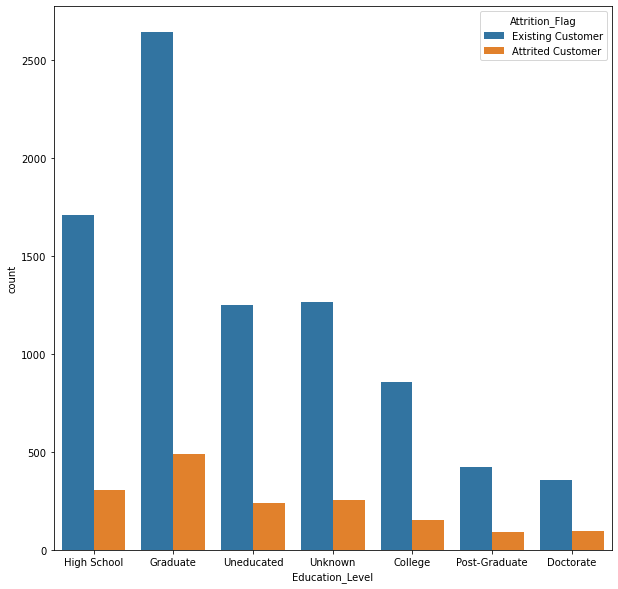

In [29]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Education_Level", hue='Attrition_Flag', data=data)

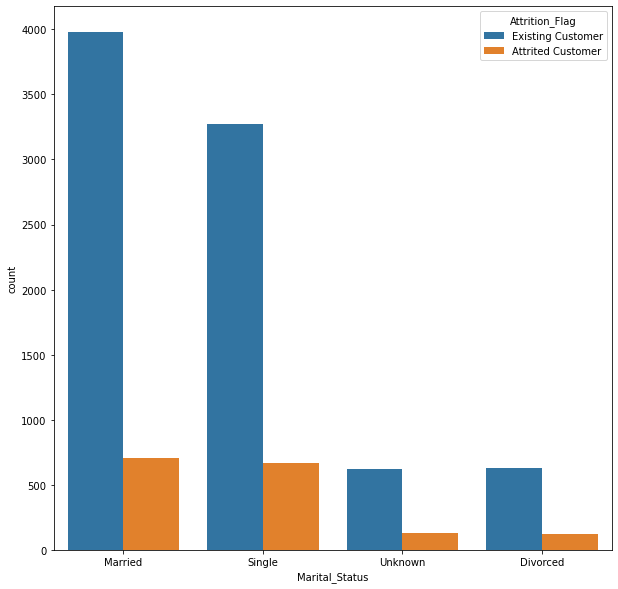

In [30]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Marital_Status", hue='Attrition_Flag', data=data)

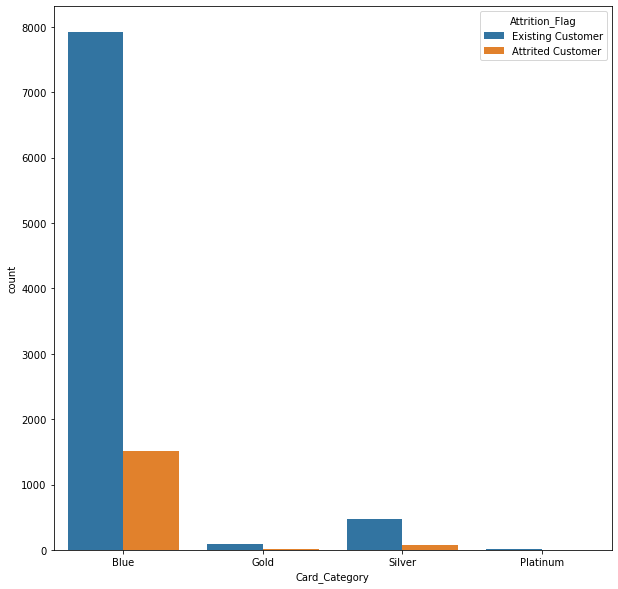

In [31]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Card_Category", hue='Attrition_Flag', data=data)

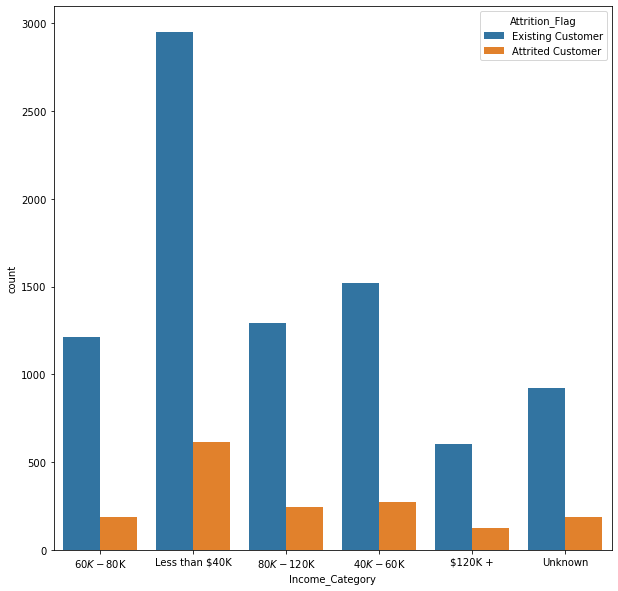

In [34]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Income_Category", hue='Attrition_Flag', data=data)

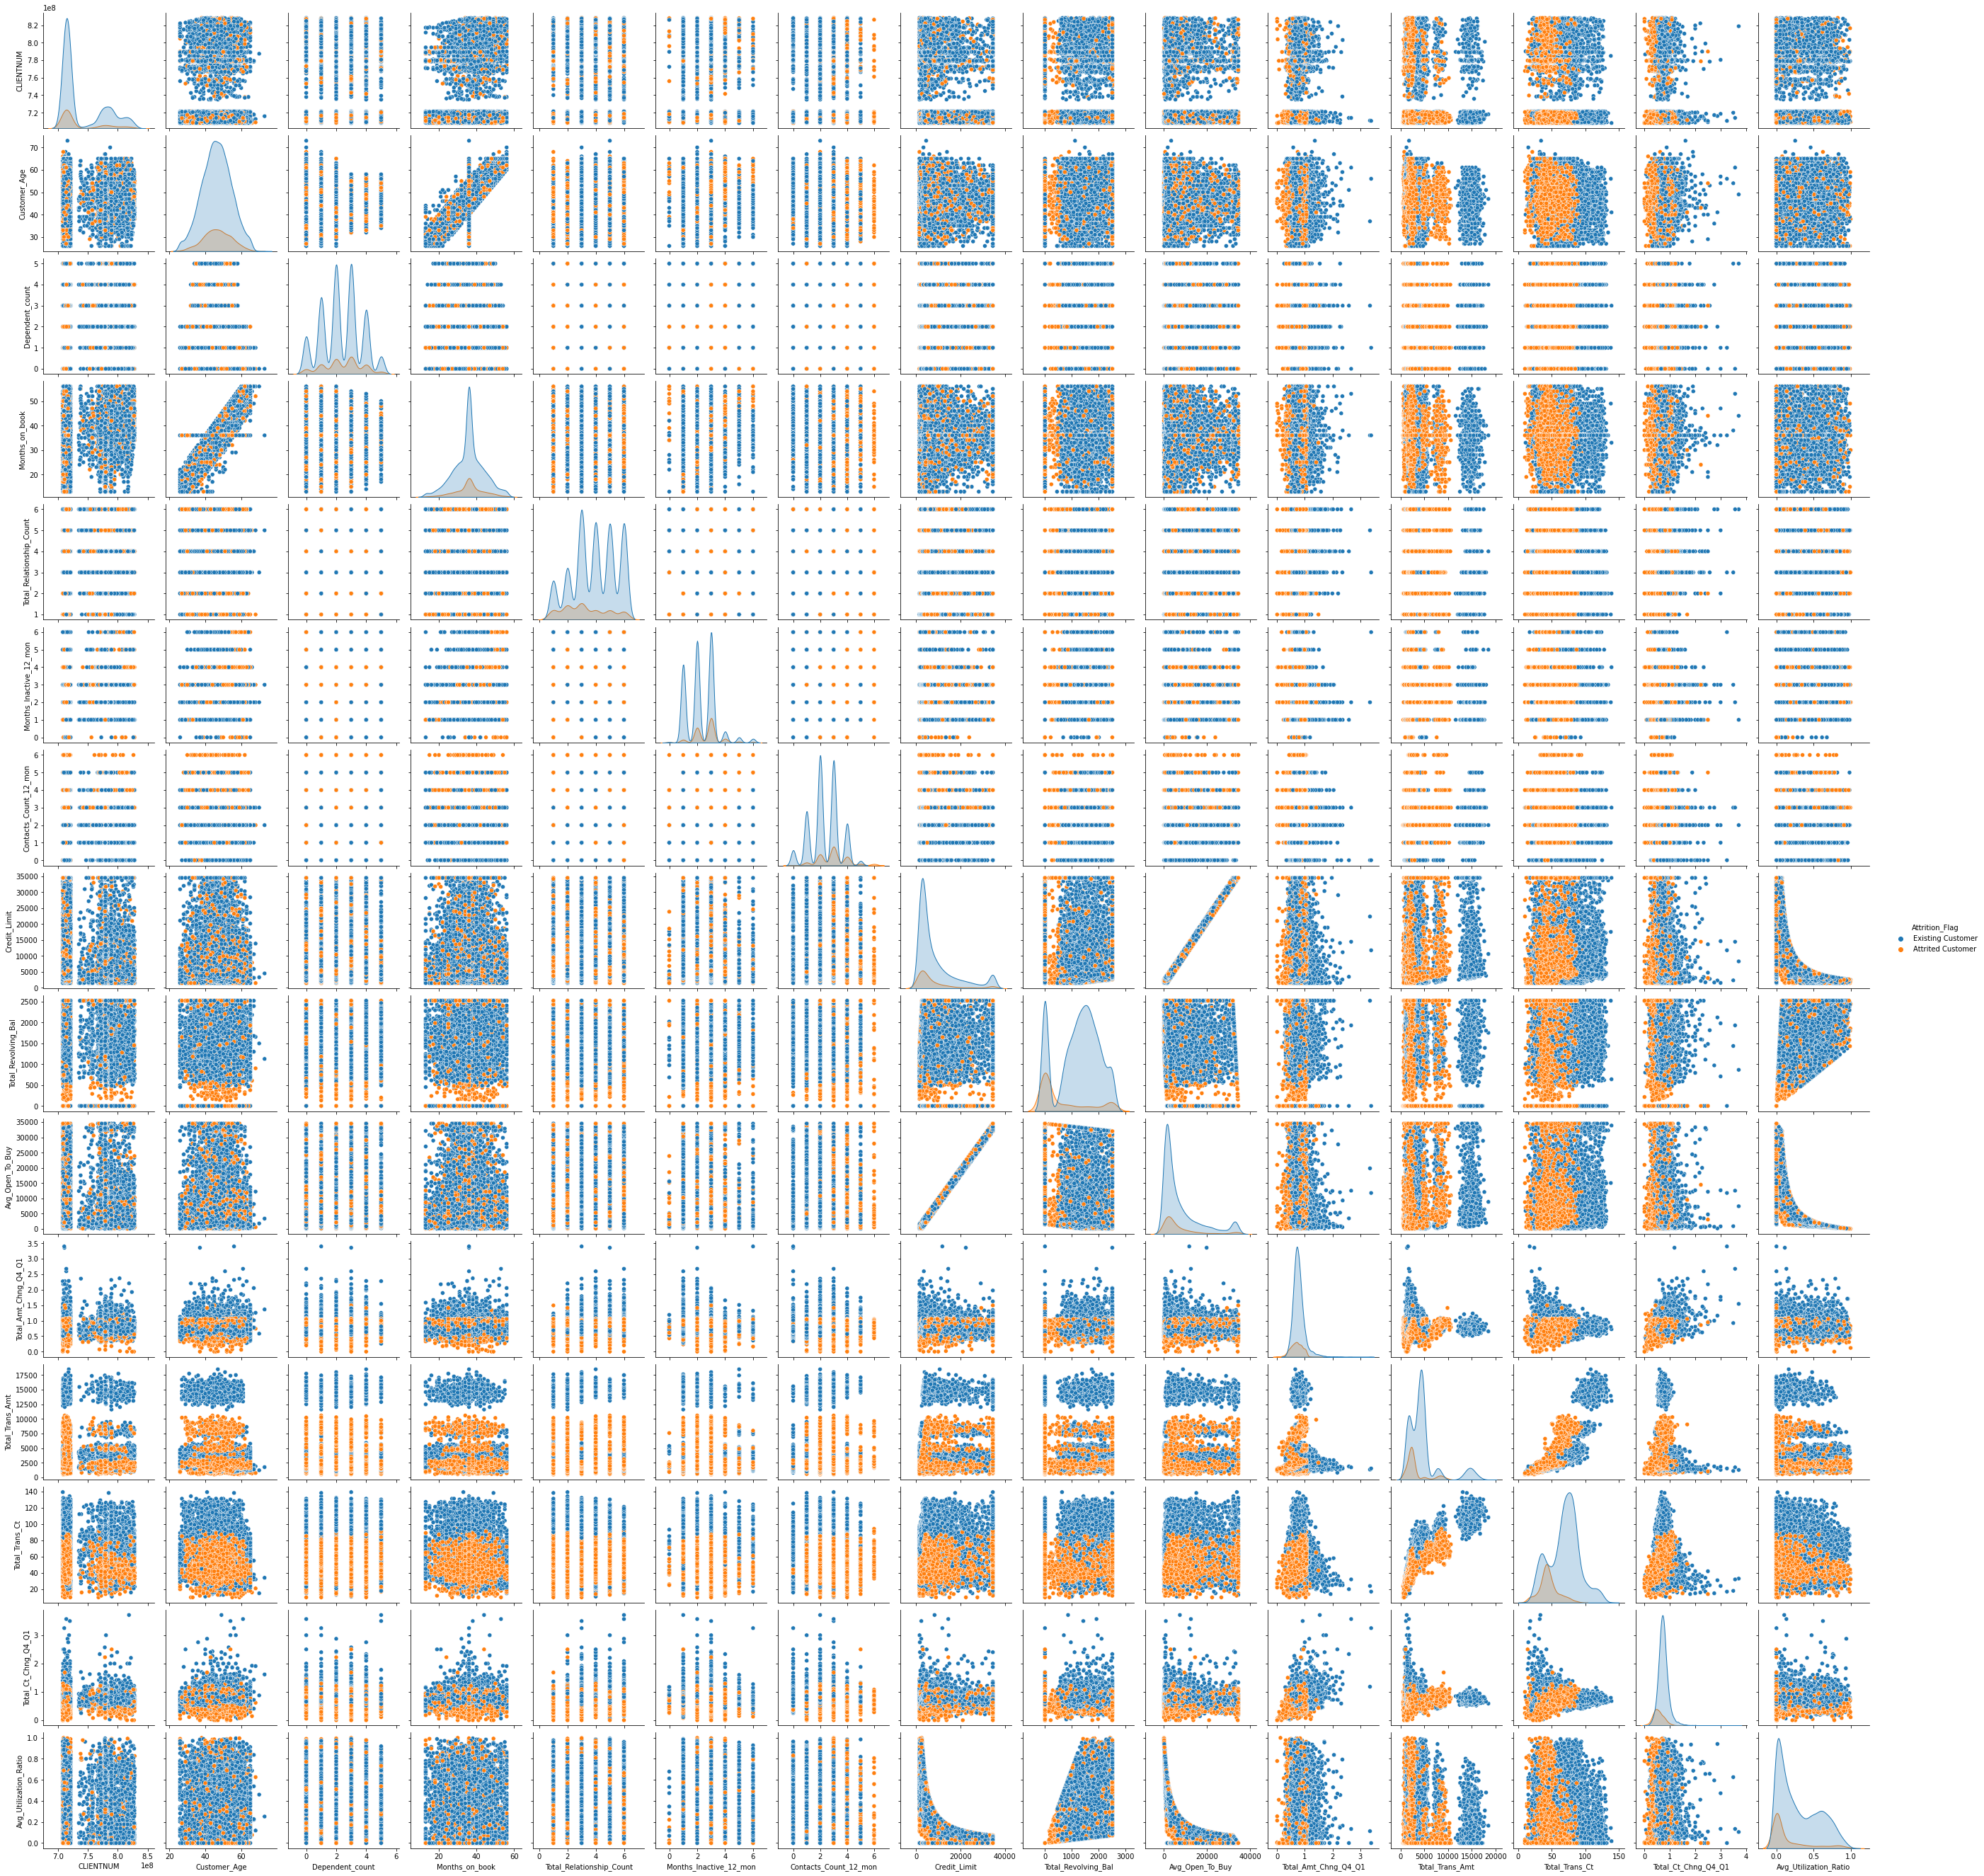

In [39]:
sns.pairplot(data, hue='Attrition_Flag')

<AxesSubplot:>

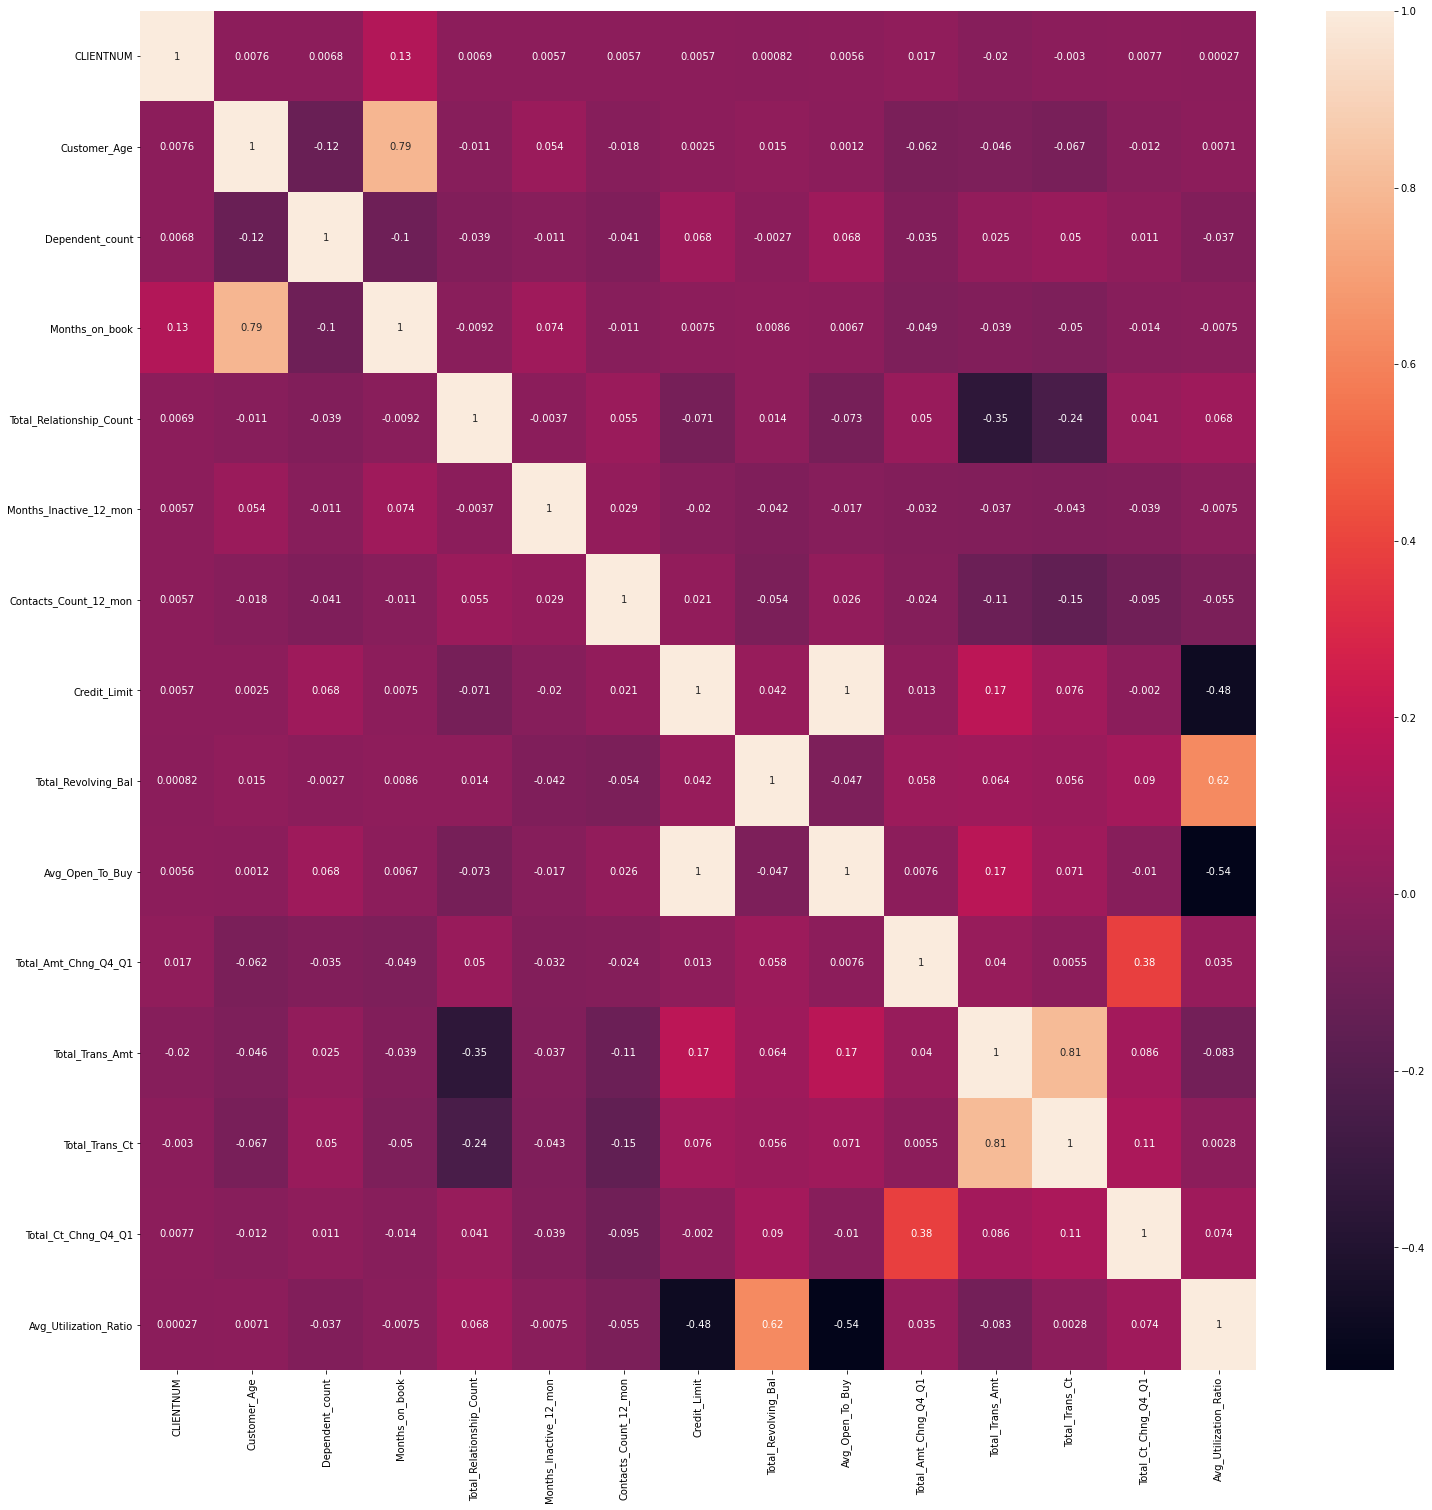

In [337]:
correlations = data.corr()
f, ax = plt.subplots(figsize=(25,25))
sns.heatmap(correlations, annot=True)

In [16]:
data_atrition = data[data['Attrition_Flag'] == 'Attrited Customer']

In [19]:
data_no_atrition = data[data['Attrition_Flag'] == 'Existing Customer']

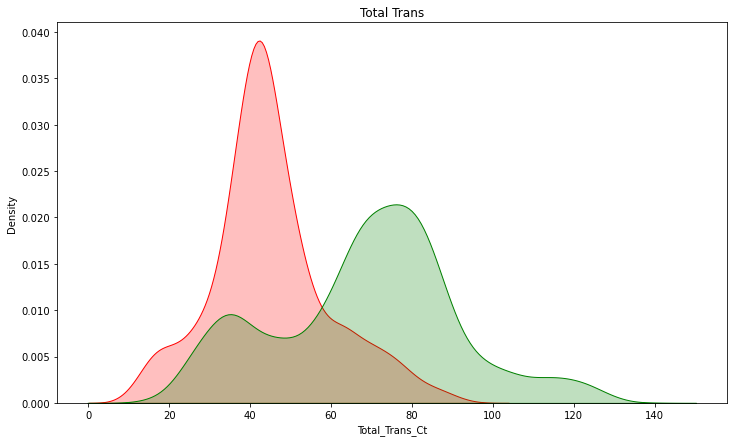

In [41]:
plt.figure(figsize=(12,7))
ax = sns.kdeplot(data_atrition['Total_Trans_Ct'], label = 'Total Trans - Atriction', shade = True, color = 'r')
ax = sns.kdeplot(data_no_atrition['Total_Trans_Ct'], label = 'Total Trans - No Atriction', shade = True, color = 'g');
plt.title("Total Trans")
plt.show()

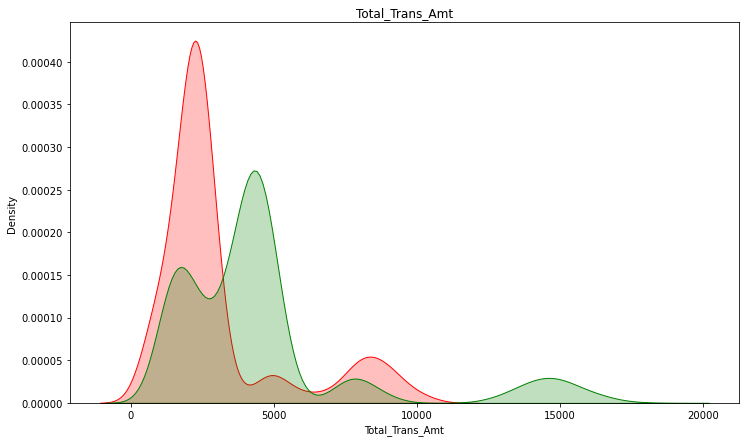

In [42]:
plt.figure(figsize=(12,7))
ax = sns.kdeplot(data_atrition['Total_Trans_Amt'], label = 'Total_Trans_Amt- Atriction', shade = True, color = 'r')
ax = sns.kdeplot(data_no_atrition['Total_Trans_Amt'], label = 'Total_Trans_Amt - No Atriction', shade = True, color = 'g');
plt.title("Total_Trans_Amt")
plt.show()

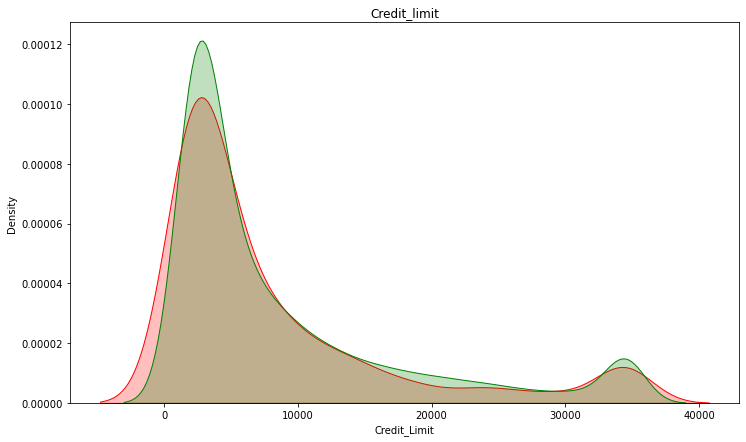

In [44]:
plt.figure(figsize=(12,7))
ax = sns.kdeplot(data_atrition['Credit_Limit'], label = 'Credit_Limit- Atriction', shade = True, color = 'r')
ax = sns.kdeplot(data_no_atrition['Credit_Limit'], label = 'Credit_Limit - No Atriction', shade = True, color = 'g');
plt.title("Credit_limit")
plt.show()

In [47]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [76]:
data_categorical = data[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]

In [77]:
data_numerical = data[['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                      'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                      'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

In [79]:
data_categorical.head()

Gender Education_Level Marital_Status Income_Category Card_Category
0      M     High School        Married     $60K - $80K          Blue
1      F        Graduate         Single  Less than $40K          Blue
2      M        Graduate        Married    $80K - $120K          Blue
3      F     High School        Unknown  Less than $40K          Blue
4      M      Uneducated        Married     $60K - $80K          Blue

In [80]:
data_numerical.head()

Customer_Age  Months_on_book  Total_Relationship_Count  \
0            45              39                         5   
1            49              44                         6   
2            51              36                         4   
3            40              34                         3   
4            40              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [84]:
enc = OneHotEncoder()

data_categorical_enc = pd.DataFrame(enc.fit_transform(data_categorical).toarray())

In [85]:
data_categorical_enc.head()

0    1    2    3    4    5    6    7    8    9   ...   13   14   15   16  \
0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
3  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   

    17   18   19   20   21   22  
0  0.0  0.0  1.0  0.0  0.0  0.0  
1  1.0  0.0  1.0  0.0  0.0  0.0  
2  0.0  0.0  1.0  0.0  0.0  0.0  
3  1.0  0.0  1.0  0.0  0.0  0.0  
4  0.0  0.0  1.0  0.0  0.0  0.0  

[5 rows x 23 columns]

In [87]:
data_all = pd.concat([data_categorical_enc, data_numerical], axis = 1)

In [88]:
data_all.head()

0    1    2    3    4    5    6    7    8    9  ...  \
0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   
2  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   
3  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 36 columns]

In [93]:
X = data_all

In [94]:
y = data['Attrition_Flag']

In [105]:
le = LabelEncoder()
y = le.fit_transform(y)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [107]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [169]:
target_names = ['Attrited Customer', 'Existing Customer']

In [280]:
parameters_rf = {'n_estimators':range(10,400,5),
                'max_depth':range(2,8,2)}

In [281]:
rf = RandomForestClassifier(class_weight = 'balanced')

clf_rf = RandomizedSearchCV(rf, parameters_rf, random_state=0)

clf_rf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                   param_distributions={'max_depth': range(2, 8, 2),
                                        'n_estimators': range(10, 400, 5)},
                   random_state=0)

In [339]:
y_pred_rf = clf_rf.predict(X_test)

In [340]:
average_precision_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_rf)

(0.9647152514339928, 0.9016187700582243)

<AxesSubplot:>

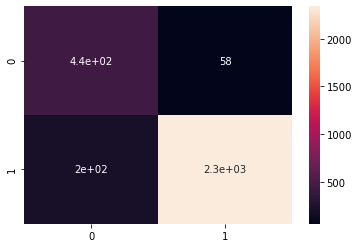

In [341]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)

In [342]:
print(classification_report(y_test, y_pred_rf, target_names=target_names))

                   precision    recall  f1-score   support

Attrited Customer       0.68      0.88      0.77       496
Existing Customer       0.98      0.92      0.95      2543

         accuracy                           0.91      3039
        macro avg       0.83      0.90      0.86      3039
     weighted avg       0.93      0.91      0.92      3039



In [272]:
parameters_gb = {'learning_rate':(0.1,0.01), 'n_estimators':range(10,400,5),
                'max_depth':range(2,8,2)
              }

In [273]:
gb = GradientBoostingClassifier()

clf_gb = RandomizedSearchCV(gb, parameters_gb, random_state=0)

clf_gb.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': (0.1, 0.01),
                                        'max_depth': range(2, 8, 2),
                                        'n_estimators': range(10, 400, 5)},
                   random_state=0)

In [274]:
y_pred_gb = clf_gb.predict(X_test)

In [286]:
average_precision_score(y_test, y_pred_gb), roc_auc_score(y_test, y_pred_gb)

(0.974390932233351, 0.9316514023315108)

<AxesSubplot:>

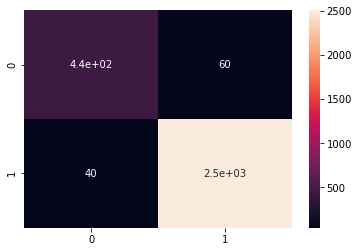

In [287]:
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True)

In [288]:
print(classification_report(y_test, y_pred_gb, target_names=target_names))

                   precision    recall  f1-score   support

Attrited Customer       0.92      0.88      0.90       496
Existing Customer       0.98      0.98      0.98      2543

         accuracy                           0.97      3039
        macro avg       0.95      0.93      0.94      3039
     weighted avg       0.97      0.97      0.97      3039



In [311]:
clf_lg = LogisticRegression(C=0.5, penalty='l2',n_jobs=6, random_state=0)

clf_lg.fit(X_train, y_train)

LogisticRegression(C=0.5, n_jobs=6, random_state=0)

In [312]:
y_pred_lg = clf_lg.predict(X_test)

In [313]:
average_precision_score(y_test, y_pred_lg), roc_auc_score(y_test, y_pred_lg)

(0.9053344396480075, 0.7315396946710133)

<AxesSubplot:>

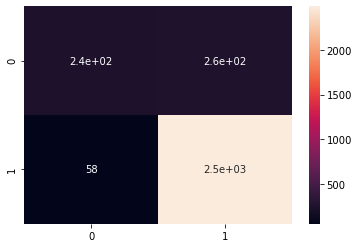

In [314]:
sns.heatmap(confusion_matrix(y_test, y_pred_lg), annot=True)

In [315]:
print(classification_report(y_test, y_pred_lg, target_names=target_names))

                   precision    recall  f1-score   support

Attrited Customer       0.81      0.49      0.61       496
Existing Customer       0.91      0.98      0.94      2543

         accuracy                           0.90      3039
        macro avg       0.86      0.73      0.77      3039
     weighted avg       0.89      0.90      0.89      3039



In [333]:
y_pred_all = (0.5*y_pred_gb) + (y_pred_rf*0.3) + (y_pred_lg*0.2)

In [334]:
average_precision_score(y_test, y_pred_all), roc_auc_score(y_test, y_pred_all)

(0.9867917711689997, 0.9635094915834739)